**Download Repository**



In [1]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004 (from 1)
Receiving objects: 100% (1004/1004), 137.72 MiB | 27.61 MiB/s, done.
Resolving deltas: 100% (588/588), done.


In [2]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [3]:
pwd

'/content/Mask_RCNN-TF2'

In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.8 MB/s eta 0:00:00


In [5]:
!python setup.py install

/content/Mask_RCNN-TF2/setup.py:9: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:452: Setu

In [6]:
%cd ..

/content


In [7]:
pwd

'/content'

**Import libraries**

In [8]:
import os
import sys
import cv2
import skimage.io
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.1


In [9]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [10]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [11]:
sys.path.append(ROOT_DIR)

In [12]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [13]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [14]:
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))

In [15]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [16]:
import coco

In [17]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


In [18]:
MODEL_DIR,IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

**Loading pre_trained NN**

In [19]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_tf2_coco.h5')

In [20]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [21]:
class InferConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [22]:
config = InferConfig()

In [23]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [24]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

In [25]:
image= skimage.io.imread('/content/Mask_RCNN-TF2/images/7933423348_c30bd9bd4e_z.jpg')

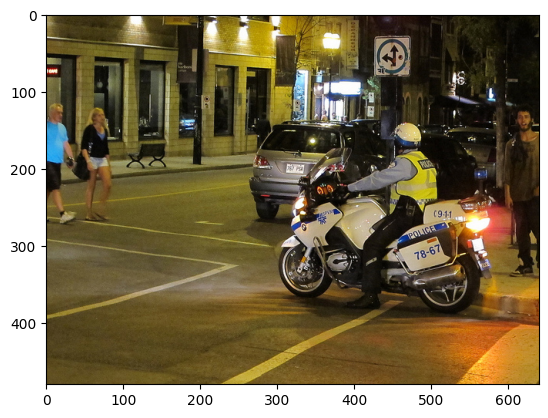

In [26]:
plt.imshow(image)

In [ ]:
network = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

In [27]:
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import torchvision.transforms.functional as F

weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = image = Image.open('/content/Mask_RCNN-TF2/images/7933423348_c30bd9bd4e_z.jpg')
image_tensor = F.to_tensor(image).unsqueeze(0)

model = maskrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

output = model(image_tensor)
print(output)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


[{'boxes': tensor([[3.8214e+02, 1.3873e+02, 5.1779e+02, 3.7781e+02],
        [4.1984e+01, 1.2037e+02, 8.7157e+01, 2.6879e+02],
        [5.9183e+02, 1.1846e+02, 6.3984e+02, 3.4265e+02],
        [9.7968e-02, 1.1462e+02, 4.3438e+01, 2.7114e+02],
        [2.9375e+02, 1.8674e+02, 5.7227e+02, 3.8360e+02],
        [1.0425e+02, 1.6635e+02, 1.6020e+02, 2.0145e+02],
        [2.6827e+02, 1.4113e+02, 4.3163e+02, 2.6314e+02],
        [5.2138e+02, 1.4833e+02, 5.8555e+02, 2.1616e+02],
        [1.7225e+02, 1.3279e+02, 1.9482e+02, 1.6010e+02],
        [3.5656e+02, 1.2456e+02, 3.6655e+02, 1.3927e+02],
        [5.0056e+02, 1.5055e+02, 5.7167e+02, 2.3080e+02],
        [3.0701e+01, 1.7976e+02, 5.7318e+01, 2.1642e+02],
        [4.2006e+02, 2.3372e+02, 5.7798e+02, 3.8753e+02],
        [4.8841e+02, 1.4214e+02, 5.2267e+02, 1.5878e+02],
        [2.6858e+02, 1.3105e+02, 2.9204e+02, 1.7735e+02],
        [4.0921e+02, 1.4671e+02, 5.9254e+02, 2.4314e+02],
        [2.9369e+02, 1.5666e+02, 4.5939e+02, 3.3054e+02],
   

In [28]:
coco_name= ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush','sky']

In [29]:
# Extract class labels
labels = output[0]['labels']

# Map labels to class names
class_names = [
    coco_name[label.item()] if 0 <= label.item() < len(coco_name) else "Unknown"
    for label in labels
]

# Print the class names of detected objects
print(class_names)


['person', 'person', 'person', 'person', 'motorcycle', 'bird', 'car', 'car', 'car', 'person', 'car', 'skis', 'motorcycle', 'car', 'person', 'car', 'motorcycle', 'skis', 'bench', 'person', 'car', 'bottle', 'person', 'wine glass', 'person', 'handbag', 'person', 'bottle', 'motorcycle', 'skis', 'person', 'bus', 'car', 'car', 'bird', 'skis', 'car', 'bird']


In [30]:
masks = output[0]['masks']
print(masks)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [31]:
print(masks.shape)



torch.Size([38, 1, 480, 640])


shape = torch.Size([38, 1, 480, 640]), dtype = torch.bool


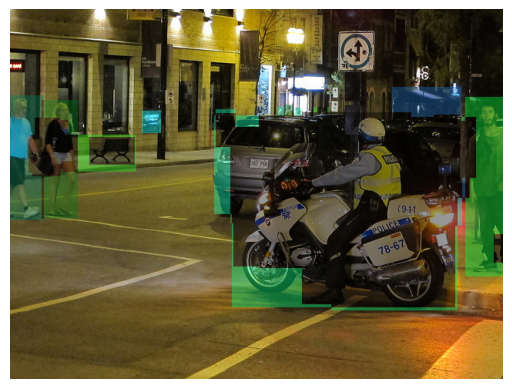

In [32]:
from torchvision.utils import draw_segmentation_masks
import torch

proba_threshold = 0.5
bool_masks = output[0]['masks'] > proba_threshold
print(f"shape = {bool_masks.shape}, dtype = {bool_masks.dtype}")


# Example: Input image tensor (should be [C, H, W])
image = image_tensor[0]  # actual image tensor

# Extract masks from output
bool_masks = torch.cat([o['masks'] for o in output], dim=0)  # Combine all masks

# Squeeze masks to [N, H, W]
bool_masks = bool_masks.squeeze(1)

# Convert masks to bool type
bool_masks = bool_masks.to(torch.bool)  # Convert to boolean type

# Ensure the image is in uint8 format
if image.dtype != torch.uint8:
    image = (image * 255).to(torch.uint8)

# Draw segmentation masks
output_image = draw_segmentation_masks(image, bool_masks, alpha=0.4)

# Visualize the result
plt.imshow(output_image.permute(1, 2, 0).cpu().numpy())  # Convert to image format
plt.axis('off')  # Optional: remove axes
plt.show()



In [33]:
label=output[0]['labels']
print(label)

tensor([ 1,  1,  1,  1,  4, 15,  3,  3,  3,  1,  3, 31,  4,  3,  1,  3,  4, 31,
        14,  1,  3, 40,  1, 41,  1, 27,  1, 40,  4, 31,  1,  6,  3,  3, 15, 31,
         3, 15])


In [34]:
scores = output[0]['scores']
print(scores)


tensor([0.9996, 0.9993, 0.9987, 0.9981, 0.9967, 0.9937, 0.9802, 0.9794, 0.8817,
        0.8774, 0.7540, 0.6841, 0.6367, 0.6264, 0.4299, 0.4255, 0.3777, 0.3663,
        0.3604, 0.2343, 0.2118, 0.1998, 0.1796, 0.1634, 0.1262, 0.1127, 0.1025,
        0.1005, 0.0980, 0.0967, 0.0881, 0.0839, 0.0727, 0.0673, 0.0618, 0.0549,
        0.0537, 0.0520], grad_fn=<IndexBackward0>)


In [35]:
print(class_names)

['person', 'person', 'person', 'person', 'motorcycle', 'bird', 'car', 'car', 'car', 'person', 'car', 'skis', 'motorcycle', 'car', 'person', 'car', 'motorcycle', 'skis', 'bench', 'person', 'car', 'bottle', 'person', 'wine glass', 'person', 'handbag', 'person', 'bottle', 'motorcycle', 'skis', 'person', 'bus', 'car', 'car', 'bird', 'skis', 'car', 'bird']
